In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("data/train.csv")

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### How many people were there in the ship

In [32]:
total_examples_in_train_data = pd.read_csv("data/train.csv").shape[0]
total_examples_in_test_data = pd.read_csv("data/test.csv").shape[0]

total_examples_in_train_data + total_examples_in_test_data

1309

#### What are all features in the dataset?

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### How many men and women were there in the ship?

In [39]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
df['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

#### What is the survival rate on the basis of gender?

In [34]:
df[df['Sex'] == 'female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [38]:
233/(233 + 81)

0.7420382165605095

In [36]:
df[df['Sex'] == 'male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [40]:
109 / (109 + 468)

0.18890814558058924

In [48]:
pd.crosstab(df['Sex'], df['Survived'], margins = True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### How many senior citizens were there?

In [54]:
df[df['Age'] >= 60].shape[0]

26

#### How many children were there?

In [55]:
df[df['Age'] <= 12].shape[0]

69

#### How many children died?

In [57]:
df[(df['Age'] <= 12) & (df['Survived'] == 0)].shape[0]

29

#### What is survival rate of children?

In [58]:
(69 - 29) / 69

0.5797101449275363

#### What is the survival rate of children with parents?

In [78]:
df[(df['Age'] <= 12) & (df['Parch'] == 0)]['Survived'].value_counts()

1    2
0    1
Name: Survived, dtype: int64

In [63]:
38 / (38 + 28)

0.5757575757575758

#### What was the name and age of oldest guy?

In [96]:
df[df['Age'] == df['Age'].max()]['Name']

630    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object

In [94]:
df['Age'].max()

80.0

#### How many cabins were there?

In [105]:
df['Cabin'] = df['Cabin'].fillna(value = 'Z')

In [116]:
df['Cabin'] = df['Cabin'].str[0]

In [117]:
df['Cabin'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [118]:
pd.crosstab(df['Cabin'], df['Pclass'], margins = True)

Pclass,1,2,3,All
Cabin,,,,
A,15,0,0,15
B,47,0,0,47
C,59,0,0,59
D,29,4,0,33
E,25,4,3,32
F,0,8,5,13
G,0,0,4,4
T,1,0,0,1
Z,40,168,479,687


In [119]:
df.groupby('Cabin')['Fare'].mean()

Cabin
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
T     35.500000
Z     19.157325
Name: Fare, dtype: float64

In [121]:
pd.pivot_table(df, index = ['Cabin'], columns = ['Pclass'], values = ['Fare'])

Fare                      
Pclass           1          2          3
Cabin                                   
A        39.623887        NaN        NaN
B       113.505764        NaN        NaN
C       100.151341        NaN        NaN
D        63.324286  13.166675        NaN
E        55.740168  11.587500  11.000000
F              NaN  23.750000  10.611660
G              NaN        NaN  13.581250
T        35.500000        NaN        NaN
Z        76.848643  20.909673  13.725077

In [143]:
df[(df['Pclass'] == 1) & (df['Cabin'] == 'B') & (df['Sex'] == 'female' )]['Survived'].value_counts()

1    27
Name: Survived, dtype: int64

In [128]:
8 / 20

0.4

In [162]:
pd.pivot_table(df[df['Sex'] == 'male'], index = ['Cabin'], columns = ['Pclass'], values = ['Survived'], aggfunc = lambda x: (x.count() - x.sum()) / x.count())

Survived                    
Pclass         1         2         3
Cabin                               
A       0.571429       NaN       NaN
B       0.600000       NaN       NaN
C       0.656250       NaN       NaN
D       0.538462  0.500000       NaN
E       0.466667       NaN  0.000000
F            NaN  0.250000  1.000000
T       1.000000       NaN       NaN
Z       0.777778  0.872549  0.868035

In [161]:
df[(df['Sex'] == 'female') & (df['Cabin'] == 'C') & (df['Survived'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C,S


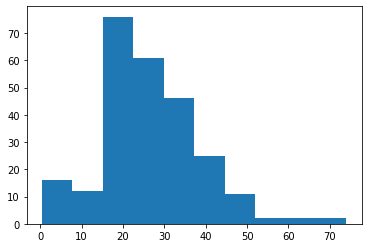

In [165]:
plt.hist(df[(df['Sex'] == 'male') & (df['Pclass'] == 3)]['Age'])
plt.show()

In [174]:
df[(df['Sex'] == 'male') & (df['Pclass'] == 3) & (df['Age'] > 30)]['Survived'].value_counts()

0    71
1     9
Name: Survived, dtype: int64

In [173]:
29 / 31

0.9354838709677419

In [175]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64